In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pollution = pd.read_csv('pollution_wide.csv')

In [14]:
# # Construct CI bounds for averages
# average_ests['lower'] = average_ests['mean'] - 1.96*average_ests['std_err']
# average_ests['upper'] = average_ests['mean'] + 1.96*average_ests['std_err']

# # Setup a grid of plots, with non-shared x axes limits
# g = sns.FacetGrid(average_ests, row = 'pollutant', sharex = False)

# # Plot CI for average estimate
# g.map(plt.hlines, 'y', 'lower', 'upper')

# # Plot observed values for comparison and remove axes labels
# g.map(plt.scatter, 'seen', 'y', color = 'orangered').set_ylabels('').set_xlabels('')

# plt.show()

In [15]:
# # Set start and ends according to intervals 
# # Make lines thicker and transparent
# plt.hlines(y = 'year', xmin = 'lower', xmax = 'upper', 
#            linewidth = 5, color = 'steelblue', alpha = 0.7,
#            data = diffs_by_year)
# # Point estimates
# plt.plot('mean', 'year', 'k|', data = diffs_by_year)

# # Add a 'null' reference line at 0 and color orangered
# plt.axvline(x = 0, color = 'orangered', linestyle = '--')

# # Set descriptive axis labels and title
# plt.xlabel('95% CI')
# plt.title('Avg SO2 differences between Cincinnati and Indianapolis')
# plt.show()

Making a confidence band

In [16]:
# # Draw 99% inverval bands for average NO2
# vandenberg_NO2['lower'] = vandenberg_NO2['mean'] - 2.58*vandenberg_NO2['std_err']
# vandenberg_NO2['upper'] = vandenberg_NO2['mean'] + 2.58*vandenberg_NO2['std_err']

# # Plot mean estimate as a white semi-transparent line
# plt.plot('day', 'mean', data = vandenberg_NO2,
#          color = 'white', alpha = 0.4)

# # Fill between the upper and lower confidence band values
# plt.fill_between(x = 'day', 
#                  y1 = 'lower', y2 = 'upper', 
#                  data = vandenberg_NO2)

# plt.show()

Separating a lot of bands

In [17]:
# # Setup a grid of plots with columns divided by location
# g = sns.FacetGrid(eastern_SO2, col = 'city', col_wrap = 2)

# # Map interval plots to each cities data with corol colored ribbons
# g.map(plt.fill_between, 'day', 'lower', 'upper', color = 'coral')

# # Map overlaid mean plots with white line
# g.map(plt.plot, 'day', 'mean', color = 'white')

# plt.show()

In [18]:
# for city, color in [('Denver',"#66c2a5"), ('Long Beach', "#fc8d62")]:
#     # Filter data to desired city
#     city_data = SO2_compare[SO2_compare.city  ==  city]

#     # Set city interval color to desired and lower opacity
#     plt.fill_between(x = 'day', y1 = 'lower', y2 = 'upper', data = city_data,
#                      color = color, alpha = 0.4 )
    
#     # Draw a faint mean line for reference and give a label for legend
#     plt.plot('day','mean', data = city_data, label = city,
#              color = color, alpha = 0.25)

# plt.legend()
# plt.show()

In [19]:
# # Add interval percent widths
# alphas = [     0.01,  0.05,   0.1] 
# widths = [ '99% CI', '95%', '90%']
# colors = ['#fee08b','#fc8d59','#d53e4f']

# for alpha, color, width in zip(alphas, colors, widths):
#     # Grab confidence interval
#     conf_ints = pollution_model.conf_int(alpha)
    
#     # Pass current interval color and legend label to plot
#     plt.hlines(y = conf_ints.index, xmin = conf_ints[0], xmax = conf_ints[1],
#                colors = color, label = width, linewidth = 10) 

# # Draw point estimates
# plt.plot(pollution_model.params, pollution_model.params.index, 'wo', label = 'Point Estimate')

# plt.legend()
# plt.show() 

In [20]:
# int_widths = ['90%', '99%']
# z_scores = [1.67, 2.58]
# colors = ['#fc8d59', '#fee08b']

# for percent, Z, color in zip(int_widths, z_scores, colors):
    
#     # Pass lower and upper confidence bounds and lower opacity
#     plt.fill_between(
#         x = cinci_13_no2.day, alpha = 0.4, color = color,
#         y1 = cinci_13_no2['mean'] - Z*cinci_13_no2['std_err'],
#         y2 = cinci_13_no2['mean'] + Z*cinci_13_no2['std_err'],
#         label = percent)
    
# plt.legend()
# plt.show()

In [21]:
# # Decrase interval thickness as interval widens
# sizes =      [      15,    10,     5]
# int_widths = ['90% CI', '95%', '99%']
# z_scores =   [    1.67,  1.96,  2.58]

# for percent, Z, size in zip(int_widths, z_scores, sizes):
#     plt.hlines(y = rocket_model.pollutant, 
#                xmin = rocket_model['est'] - Z*rocket_model['std_err'],
#                xmax = rocket_model['est'] + Z*rocket_model['std_err'],
#                label = percent, 
#                # Resize lines and color them gray
#                linewidth = size, 
#                color = 'gray') 

# # Add point estimate
# plt.plot('est', 'pollutant', 'wo', data = rocket_model, label = 'Point Estimate')
# plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
# plt.show()

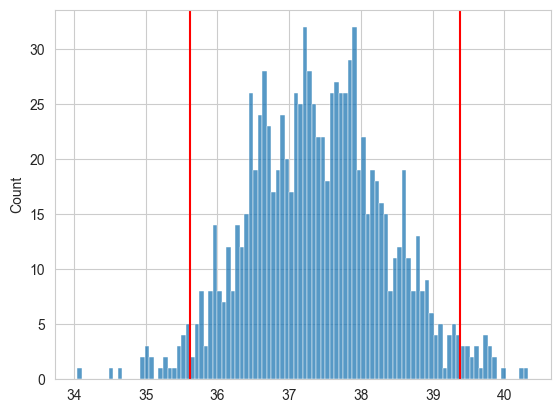

In [37]:
denver_may = pollution.query("city == 'Denver' & month == 8")
# Perform bootstrapped mean on a vector
def bootstrap(data, n_boots):
    return [np.mean(np.random.choice(data,len(data)))
        for _ in range(n_boots) ]
    
# Generate 1,000 bootstrap samples
boot_means = bootstrap(denver_may.NO2, 1000)

# Get lower and upper 95% interval bounds
lower, upper = np.percentile(boot_means, [2.5, 97.5])

# Using with sns.axes_style() as style_context:
with sns.axes_style('whitegrid'):
    # Plot histogram of bootstrapped means
    sns.histplot(boot_means, bins = 100, kde=False)
    # Add lines for interval bounds
    plt.axvline(lower, color = 'red')
    plt.axvline(upper, color = 'red')
    
    plt.show()

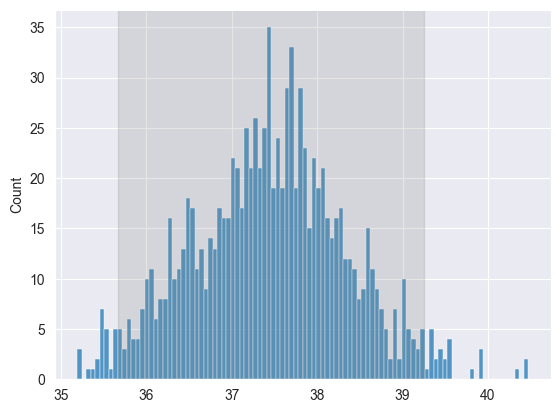

In [39]:
denver_may = pollution.query("city == 'Denver' & month == 8")

# Perform bootstrapped mean on a vector
def bootstrap(data, n_boots):
    return [np.mean(np.random.choice(data,len(data)))
        for _ in range(n_boots) ]
    
# Generate 1,000 bootstrap samples
boot_means = bootstrap(denver_may.NO2, 1000)

# Get lower and upper 95% interval bounds
lower, upper = np.percentile(boot_means, [2.5, 97.5])

# Using with sns.axes_style() as style_context:
with sns.axes_style('darkgrid'):
    # Plot histogram of bootstrapped means
    sns.histplot(boot_means, bins = 100, kde=False)

    # Shaded background of interval
    plt.axvspan(lower, upper, color='grey', alpha=0.2)
    plt.show()

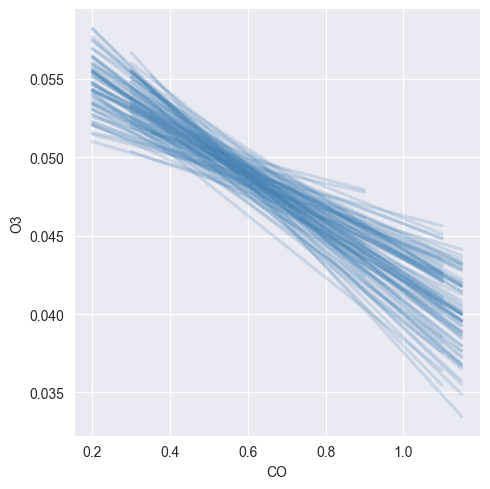

In [50]:
# Make dataframe of bootstraped data
denver_may_boot = pd.concat([
		denver_may.sample(n=len(denver_may), replace=True).assign(sample=i)
		for i in range(100)])

with sns.axes_style('darkgrid'):
    # Plot sampling distribution
    sns.lmplot(x='CO', y='O3', data=denver_may_boot, scatter=False,
        # Tell seaborn to draw a regression line for each sample
        hue='sample',
        # Make lines blue and transparent
        line_kws = {'color': 'steelblue', 'alpha': 0.2},
        # Disable built-in confidence intervals
        ci=None, legend = False)
        # Change figsize manually to improve the layout
    
    
    plt.show()


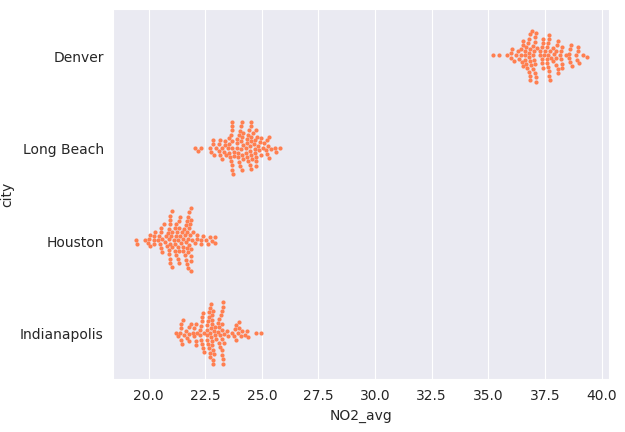

In [54]:
aug_pol = pollution.query("month == 8")

# Holder DataFrame for bootstrap samples
city_boots = pd.DataFrame()

for city in ['Denver', 'Long Beach', 'Houston', 'Indianapolis']:
    # Filter to city's NO2
    city_NO2 = aug_pol[aug_pol.city == city].NO2
    # Perform 100 bootstrap samples of city's NO2 & put in DataFrame
    cur_boot = pd.DataFrame({ 'NO2_avg': bootstrap(city_NO2, 100),
    'city': city })
    # Append to other city's bootstraps
    city_boots = pd.concat([city_boots,cur_boot])

with sns.axes_style('darkgrid'):        
    # Use beeswarm plot to visualize bootstrap samples
    sns.swarmplot(y="city", x="NO2_avg", data=city_boots, size=3,
        # Set all the colors to be the same
        color='coral')
plt.show()

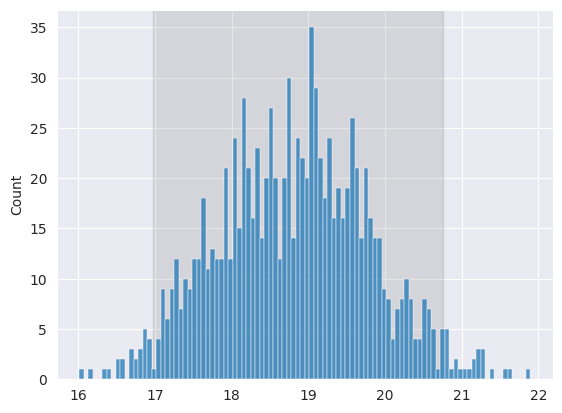

In [57]:
cinci_may_NO2 = pollution.query("city  ==  'Cincinnati' & month  ==  5").NO2

# Generate bootstrap samples
boot_means = bootstrap(cinci_may_NO2, 1000)

# Get lower and upper 95% interval bounds
lower, upper = np.percentile(boot_means, [2.5, 97.5])

with sns.axes_style('darkgrid'):
    # Plot shaded area for interval
    plt.axvspan(lower, upper, color = 'gray', alpha = 0.2)

    # Draw histogram of bootstrap samples
    sns.histplot(boot_means, bins = 100, kde = False)


plt.show()

In [ ]:
# sns.lmplot('NO2', 'SO2', data = no2_so2_boot,
#            # Tell seaborn to a regression line for each sample
#            hue = 'sample', 
#            # Make lines blue and transparent
#            line_kws = {'color': 'steelblue', 'alpha': 0.2},
#            # Disable built-in confidence intervals
#            ci = None, legend = False, scatter = False)

# # Draw scatter of all points
# plt.scatter('NO2', 'SO2', data = no2_so2)

# plt.show()

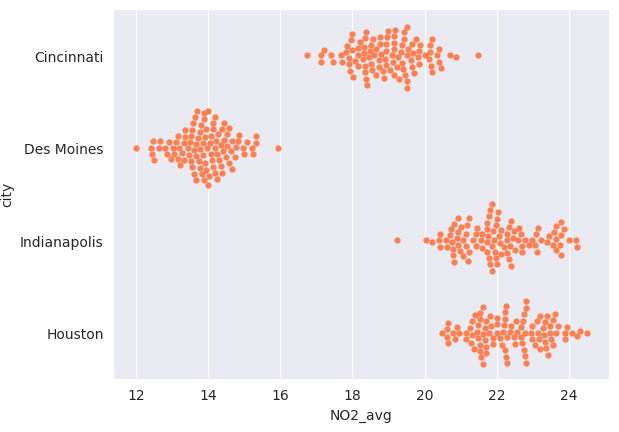

In [66]:
pollution_may = pollution.query("month  ==  5")

# Initialize a holder DataFrame for bootstrap results
city_boots = pd.DataFrame()


for city in ['Cincinnati', 'Des Moines', 'Indianapolis', 'Houston']:
    # Filter to city
    city_NO2 = pollution_may[pollution_may.city  ==  city].NO2
    # Bootstrap city data & put in DataFrame
    cur_boot = pd.DataFrame({'NO2_avg': bootstrap(city_NO2, 100), 'city': city})
    # Append to other city's bootstraps
    city_boots = pd.concat([city_boots,cur_boot])

with sns.axes_style('darkgrid'):
    # Beeswarm plot of averages with citys on y axis
    sns.swarmplot(y = "city", x = "NO2_avg", data = city_boots, color = 'coral', size = 4.5)

plt.show()